In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.style.use('ggplot')

## Prepare Data

In [2]:
iris = load_iris()
X = iris['data']
Y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
input_dim = len(feature_names)
output_dim = len(names)
print(output_dim, names)
print(input_dim, feature_names)
print(X.shape, Y.shape)
print(" ")

start,stop,step = 0,128,8

print(X[start:stop:step,:])
print(" ")
print(Y[:8])

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)
print(" ")
print(X_scaled[start:stop:step,:])

3 ['setosa' 'versicolor' 'virginica']
4 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4) (150,)
 
[[5.1 3.5 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [4.8 3.4 1.9 0.2]
 [5.2 4.1 1.5 0.1]
 [5.  3.5 1.3 0.3]
 [5.3 3.7 1.5 0.2]
 [6.3 3.3 4.7 1.6]
 [5.6 2.9 3.6 1.3]
 [6.3 2.5 4.9 1.5]
 [5.5 2.4 3.8 1.1]
 [5.6 3.  4.1 1.3]
 [5.7 2.9 4.2 1.3]
 [6.5 3.  5.8 2.2]
 [6.8 3.  5.5 2.1]
 [6.9 3.2 5.7 2.3]]
 
[0 0 0 0 0 0 0 0]
(150, 4)
 
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.39706395 -1.05217993]
 [-1.26418478  0.78880759 -1.05603939 -1.3154443 ]
 [-0.7795133   2.40018495 -1.2833891  -1.44707648]
 [-1.02184904  1.01900435 -1.39706395 -1.18381211]
 [-0.65834543  1.47939788 -1.2833891  -1.3154443 ]
 [ 0.55333328  0.55861082  0.53540856  0.52740629]
 [-0.29484182 -0.36217625 -0.08980313  0.13250973]
 [ 0.55333328 -1.28296331  0.64908342  0.3957741 ]
 [-0.41600969

## Visualize Data

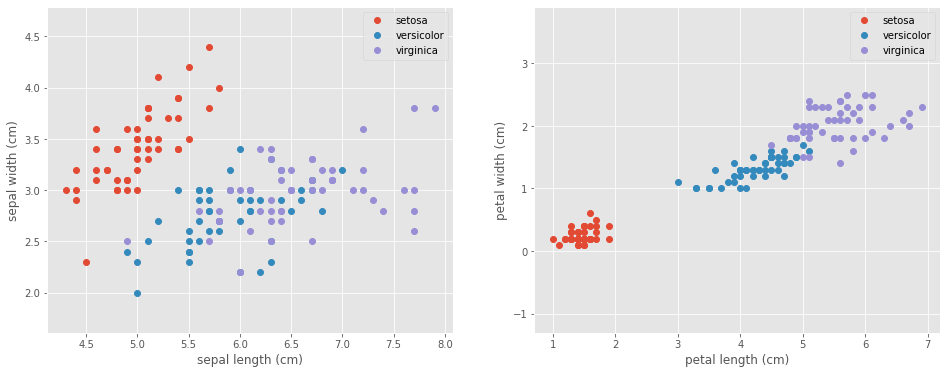

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_axis_idx = feature_names.index('sepal length (cm)')
y_axis_idx = feature_names.index('sepal width (cm)')

for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    ax1.plot(X_plot[:, x_axis_idx], X_plot[:, y_axis_idx], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[x_axis_idx])
ax1.set_ylabel(feature_names[y_axis_idx])
ax1.axis('equal')
ax1.legend();

x_axis_idx = feature_names.index('petal length (cm)')
y_axis_idx = feature_names.index('petal width (cm)')

for target, target_name in enumerate(names):
    X_plot = X[Y== target]
    ax2.plot(X_plot[:, x_axis_idx], X_plot[:, y_axis_idx], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[x_axis_idx])
ax2.set_ylabel(feature_names[y_axis_idx])
ax2.axis('equal')
ax2.legend();

## Configure Neural Network Models

a simple FeedFarward Neural Network

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
class Model(nn.Module):
    def __init__(self, input_dim=4, ouput_dim=3):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, ouput_dim)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [11]:
model = Model(input_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

## Train the Model

In [12]:
import tqdm.notebook as tqdm
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/1000 [00:00<?, ?it/s]

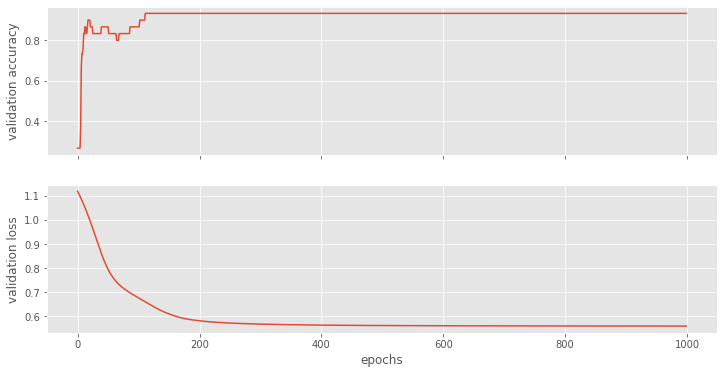

In [13]:
EPOCHS  = 1000

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))


# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)

X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).long()
X_test  = torch.from_numpy(X_test).float()
Y_test  = torch.from_numpy(Y_test).long()

for epoch in tqdm.trange(EPOCHS):
    
    # Forward Pass on Training Set
    Y_pred = model(X_train)
    loss = loss_fn(Y_pred, Y_train)
    
    # Record the loss
    loss_list[epoch] = loss.item()
    
    # Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Forward Pass on Test/Validation Set
    with torch.no_grad():
        
        Y_pred = model(X_test)
        correct = (torch.argmax(Y_pred, dim=1) == Y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
        
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

## Save Model and Preprocessing Module (scaler class object)

In [14]:
from joblib import dump

torch.save(model.state_dict(), '../model/model.pt')

dump(scaler, '../model/scaler.joblib', compress=True)

['../model/scaler.joblib']